# HSE 2022: Mathematical Methods for Data Analysis

## Homework 2

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Dataset from seaborn on diamonds prices.

In [51]:
data = sns.load_dataset('diamonds')

y = data.price
X = data.drop(['price'], axis=1)
columns = data.drop(['price'], axis=1).columns
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Linear regression

#### 0. [0.25 points] Encode categorical variables.

In [52]:
category_columns = ['cut', 'color', 'clarity']
for col in category_columns:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75


In [53]:
y = data.price
X = data.drop(['price'], axis=1)

#### 1. [0.25 points] Split the data into train and test sets with ratio 80:20 with random_state=17.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print("X_train size:", X_train.size / X.size, "X_test size:" , X_test.size / X.size)
print("y_train size:", y_train.size / y.size, "y_test size:" , y_test.size / y.size)

X_train size: 0.8 X_test size: 0.2
y_train size: 0.8 y_test size: 0.2


#### 2. [1 point] Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.6$

Don't forget to scale the data before training the models with StandardScaler!

In [55]:
#Models initialization
model_lin_reg = LinearRegression()
alpha = 0.01
model_ridge = Ridge(alpha=alpha)
model_lasso = Lasso(alpha=alpha)
l1_ratio = 0.6
model_elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train models
model_lin_reg.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)
model_elastic.fit(X_train, y_train)

#Get predicts
y_pred_lin_reg = model_lin_reg.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)

#Calculate metrics
print("Linear regression RMSE:", mean_squared_error(y_test, y_pred_lin_reg, squared=False), ", r^2:", r2_score(y_test, y_pred_lin_reg))
print("Ridge RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False), ", r^2:", r2_score(y_test, y_pred_ridge))
print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False), ", r^2:", r2_score(y_test, y_pred_lasso))
print("ElasticNet RMSE:", mean_squared_error(y_test, y_pred_elastic, squared=False), ", r^2:", r2_score(y_test, y_pred_elastic))

Linear regression RMSE: 1240.1859926621328 , r^2: 0.9050205336796836
Ridge RMSE: 1240.1856328867161 , r^2: 0.9050205887863729
Lasso RMSE: 1240.1816640520951 , r^2: 0.905021196690484
ElasticNet RMSE: 1239.8792848325652 , r^2: 0.9050675062208734


#### 3. [1 point] Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

In [56]:
print("Linear Regression coefs with interseption:", model_lin_reg.intercept_, *model_lin_reg.coef_, end='\n\n')
print("Ridge coefs with interseption:", model_ridge.intercept_, *model_ridge.coef_, end='\n\n')
print("Lasso coefs with interseption:", model_lasso.intercept_, *model_lasso.coef_, end='\n\n')
print("ElasticNet coefs with interseption:", model_elastic.intercept_, *model_elastic.coef_, end='\n\n')

Linear Regression coefs with interseption: 3928.6812893956253 5140.087392900986 -130.70763655860222 -551.468899409733 -825.7541229428607 -120.76833060407411 -65.7545104359706 -1040.8217331314822 42.99469062911957 -13.225280789415804

Ridge coefs with interseption: 3928.6812893956253 5140.054863502632 -130.70770475911814 -551.4680267039046 -825.7544601813348 -120.76605947351574 -65.75425460927286 -1040.7827820149143 42.99146406049228 -13.229318056213437

Lasso coefs with interseption: 3928.6812893956253 5139.6688479518025 -130.70593899219517 -551.4495722736934 -825.7541857161715 -120.74107893806159 -65.74234393973961 -1040.0704065162483 42.60431601366941 -13.183519835557357

ElasticNet coefs with interseption: 3928.6812893956253 4665.812723980839 -131.94598744553957 -537.7907829612611 -829.1187033092976 -90.85432921213015 -61.3967797366555 -527.2585159770404 21.53052957841968 -44.20975412102321



Большие значения R^2 говорят о хорошем объяснении модели. Значит, регрессия значима

Проверить отдельные коэффициенты на значимость можно посмотрев на коэффициенты. Нет коэффициентов, близких к нулю, значит, каждый коэффициент значим.

#### 4. [1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions.

In [57]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#### 5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Lasso regression using cross-validation with 4 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [58]:
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-4, 3, num=500);
grid_search = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=4)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 2.025877711735017}

## Gradient descent

#### 6. [3.5 points] Implement a Ridge regression model for the MSE loss function, trained by gradient descent.

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Absolute-value norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$



To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a random vector from normal distribution. The following is a template class that needs to contain the code implementing all variations of the models.

In [59]:
from sklearn.base import BaseEstimator
import statsmodels.api as sm

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg_cf=1e-2, epsilon=1e-8):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.reg_cf = reg_cf
        self.epsilon = epsilon
        
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        if self.w0 == None:
            self.w = np.random.rand(X.shape[1])
        else:
            self.w = self.w0.copy()
        self.loss_history = []
        if self.gd_type == 'GradientDescent':
            self.fit_gd(X, y)
        elif self.gd_type == 'StochasticDescent':
            self.fit_sd(X, y)
        elif self.gd_type == 'Momentum':
            self.fit_momentum(X, y)
        elif self.gd_type == 'Adagrad':
            self.fit_ada(X, y)
        return self
    def fit_gd(self, X, y):
        for it in range(self.max_iter):
            self.loss_history.append(self.calc_loss(X, y))
            
            addition = self.eta * self.calc_gradient(X, y)
            if abs(np.linalg.norm(addition)) < self.tolerance:
                break
            self.w -= addition
    def fit_sd(self, X, y):
        for it in range(self.max_iter):
            self.loss_history.append(self.calc_loss(X, y))
            
            index = np.random.choice(X.shape[0], size=int(X.shape[0] * self.delta), replace=False)
            batch_X = X[index]
            batch_y = y[index]
        
            addition = self.eta * self.calc_gradient(batch_X, batch_y)
            if abs(np.linalg.norm(addition)) < self.tolerance:
                break
            self.w -= addition
    def fit_momentum(self, X, y):
        h = 0
        for it in range(self.max_iter):
            self.loss_history.append(self.calc_loss(X, y))
            
            h = self.alpha * h + self.eta * self.calc_gradient(X, y)
            if abs(np.linalg.norm(h)) < self.tolerance:
                break
            self.w -= h
    def fit_ada(self, X, y):
        g = 0
        for it in range(self.max_iter):
            self.loss_history.append(self.calc_loss(X, y))
            
            gradient = self.calc_gradient(X, y)
            g += gradient**2
            addition = self.eta * gradient / np.sqrt(g + self.epsilon)
            if abs(np.linalg.norm(addition)) < self.tolerance:
                break
            self.w -= addition
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X.dot(self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2 * X.T.dot(self.predict(X) - y) / y.shape[0] + 2 * self.reg_cf * self.w

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return np.sum((self.predict(X) - y)**2)  / y.shape[0] + self.reg_cf * np.sum(self.w ** 2)

#### 7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [60]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = LinReg(gd_type = 'GradientDescent')
model.fit(np.array(X_train), np.array(y_train))
print("Hand-written LinReg RMSE:", mean_squared_error(y_test, model.predict(X_test), squared=False))
print("Hand-written LinReg R^2:", r2_score(y_test, model.predict(X_test)))

Hand-written LinReg RMSE: 1318.5566321905799
Hand-written LinReg R^2: 0.8926372427600545


In [61]:
model = LinReg(gd_type = 'StochasticDescent')
model.fit(np.array(X_train), np.array(y_train))
print("Hand-written LinReg RMSE:", mean_squared_error(y_test, model.predict(X_test), squared=False))
print("Hand-written LinReg R^2:", r2_score(y_test, model.predict(X_test)))

Hand-written LinReg RMSE: 1318.5545448708335
Hand-written LinReg R^2: 0.8926375826775376


In [62]:
model = LinReg(gd_type = 'Momentum')
model.fit(np.array(X_train), np.array(y_train))
print("Hand-written LinReg RMSE:", mean_squared_error(y_test, model.predict(X_test), squared=False))
print("Hand-written LinReg R^2:", r2_score(y_test, model.predict(X_test)))

Hand-written LinReg RMSE: 1318.460343414791
Hand-written LinReg R^2: 0.8926529227099983


In [63]:
model = LinReg(gd_type = 'Adagrad', eta=1000)
model.fit(np.array(X_train), np.array(y_train))
print("Hand-written LinReg RMSE:", mean_squared_error(y_test, model.predict(X_test), squared=False))
print("Hand-written LinReg R^2:", r2_score(y_test, model.predict(X_test)))

Hand-written LinReg RMSE: 1250.8814917280715
Hand-written LinReg R^2: 0.9033752430347153


In [64]:
model = Ridge().fit(X_train, y_train)
print("sklearn Ridge RMSE:", mean_squared_error(y_test, model.predict(X_test), squared=False))
print("sklearn Ridge R^2:", r2_score(y_test, model.predict(X_test)))

sklearn Ridge RMSE: 1240.1502876959687
sklearn Ridge R^2: 0.9050260025203808


Написанные руками результаты немного хуже готовых решений в библиотеке scikit-learn.

Теперь поэксперементируем с разными гиперпараметрами

In [65]:
max_iters = [10, 100, 500, 1000]
alphas = np.logspace(-3, 0)
for max_iter in max_iters:
    for alpha in alphas:
        model = LinReg(gd_type = 'Momentum', max_iter=max_iter, alpha=alpha)
        model.fit(np.array(X_train), np.array(y_train))
        print('-----------')
        print('max_iter:', max_iter)
        print('alpha:', alpha)
        print("RMSE:", mean_squared_error(y_test, model.predict(X_test), squared=False))
        print("R^2:", r2_score(y_test, model.predict(X_test)))

-----------
max_iter: 10
alpha: 0.001
RMSE: 4028.4647227168257
R^2: -0.002155723131966436
-----------
max_iter: 10
alpha: 0.0011513953993264468
RMSE: 4028.024626592649
R^2: -0.0019367708567945563
-----------
max_iter: 10
alpha: 0.0013257113655901094
RMSE: 4028.1507917947924
R^2: -0.00199953687569443
-----------
max_iter: 10
alpha: 0.0015264179671752333
RMSE: 4028.092856060532
R^2: -0.001970714140683505
-----------
max_iter: 10
alpha: 0.0017575106248547913
RMSE: 4027.486544035003
R^2: -0.0016691018424142001
-----------
max_iter: 10
alpha: 0.0020235896477251575
RMSE: 4026.9793301080254
R^2: -0.001416821160137527
-----------
max_iter: 10
alpha: 0.002329951810515372
RMSE: 4027.1819126935457
R^2: -0.0015175789217238833
-----------
max_iter: 10
alpha: 0.0026826957952797246
RMSE: 4026.8797123332606
R^2: -0.0013672764899217427
-----------
max_iter: 10
alpha: 0.0030888435964774815
RMSE: 4026.5283410096267
R^2: -0.001192532559212811
-----------
max_iter: 10
alpha: 0.0035564803062231283
RMSE: 402

RMSE: 1607.1816617452978
R^2: 0.8404906967487545
-----------
max_iter: 100
alpha: 0.07906043210907697
RMSE: 1602.7433610473902
R^2: 0.8413704637985717
-----------
max_iter: 100
alpha: 0.09102981779915217
RMSE: 1597.745302430569
R^2: 0.8423582744837763
-----------
max_iter: 100
alpha: 0.10481131341546852
RMSE: 1592.0648707602597
R^2: 0.8434772027887839
-----------
max_iter: 100
alpha: 0.1206792640639329
RMSE: 1585.725642007004
R^2: 0.8447211953090491
-----------
max_iter: 100
alpha: 0.13894954943731375
RMSE: 1578.5311932513291
R^2: 0.8461270011120964
-----------
max_iter: 100
alpha: 0.15998587196060574
RMSE: 1570.6012996415934
R^2: 0.84766910763779
-----------
max_iter: 100
alpha: 0.18420699693267165
RMSE: 1561.8574848796832
R^2: 0.8493604923279365
-----------
max_iter: 100
alpha: 0.21209508879201905
RMSE: 1552.2886302099712
R^2: 0.8512006499529657
-----------
max_iter: 100
alpha: 0.244205309454865
RMSE: 1541.909493337583
R^2: 0.8531838450441745
-----------
max_iter: 100
alpha: 0.281176

-----------
max_iter: 1000
alpha: 0.005428675439323859
RMSE: 1318.051845730776
R^2: 0.8927194309512355
-----------
max_iter: 1000
alpha: 0.006250551925273976
RMSE: 1317.9699847435184
R^2: 0.8927327564066903
-----------
max_iter: 1000
alpha: 0.0071968567300115215
RMSE: 1317.880454292567
R^2: 0.8927473293614775
-----------
max_iter: 1000
alpha: 0.008286427728546842
RMSE: 1317.786598083224
R^2: 0.892762605361096
-----------
max_iter: 1000
alpha: 0.009540954763499945
RMSE: 1317.6650944711762
R^2: 0.892782379625192
-----------
max_iter: 1000
alpha: 0.010985411419875584
RMSE: 1317.5397978064188
R^2: 0.8928027692850125
-----------
max_iter: 1000
alpha: 0.012648552168552958
RMSE: 1317.3817028907429
R^2: 0.8928284934724745
-----------
max_iter: 1000
alpha: 0.014563484775012436
RMSE: 1317.1970976387086
R^2: 0.8928585273445562
-----------
max_iter: 1000
alpha: 0.016768329368110083
RMSE: 1316.9896280901864
R^2: 0.8928922760407917
-----------
max_iter: 1000
alpha: 0.019306977288832496
RMSE: 1316.76

Особо значимых улучшений не наблюдается. Но при увеличении количества итераций качество модели немного выросло.

#### 8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD, Momentum and Adagrad. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

[Text(0.5, 1.0, 'GradientDescent')]

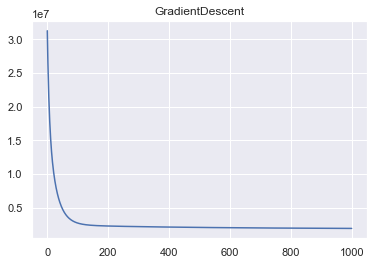

In [66]:
import seaborn as sns

model = LinReg(gd_type = 'GradientDescent')
model.fit(np.array(X_train), np.array(y_train))
sns.lineplot(data=model.loss_history).set(title='GradientDescent')

[Text(0.5, 1.0, 'StochasticDescent')]

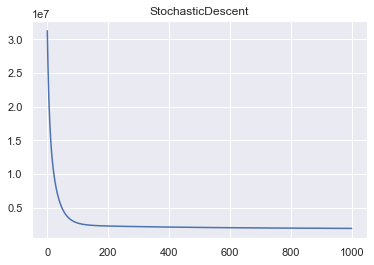

In [67]:
model = LinReg(gd_type = 'StochasticDescent')
model.fit(np.array(X_train), np.array(y_train))
sns.lineplot(data=model.loss_history).set(title='StochasticDescent')

[Text(0.5, 1.0, 'Momentum')]

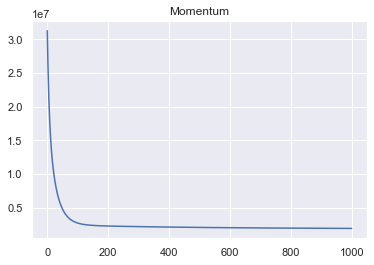

In [68]:
model = LinReg(gd_type = 'Momentum')
model.fit(np.array(X_train), np.array(y_train))
sns.lineplot(data=model.loss_history).set(title='Momentum')

[Text(0.5, 1.0, 'Adagrad')]

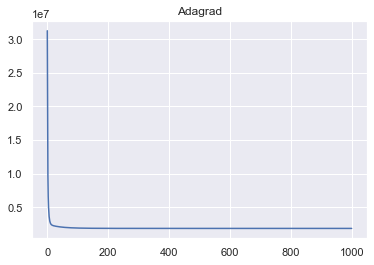

In [69]:
model = LinReg(gd_type = 'Adagrad', eta=1000)
model.fit(np.array(X_train), np.array(y_train))
sns.lineplot(data=model.loss_history).set(title='Adagrad')

При увеличении количества итераций качество модели растет